In [ ]:
#import pandas
import pandas as pd

#import numpy
import numpy as np

#import matplot for plots
import matplotlib.pyplot as plt

#import seaborn
import seaborn as sns

In [ ]:
#Read dataset
df = pd.read_csv('/content/drive/MyDrive/AI/Datasets/WHR-2024-5CS037.csv')

# Problem - 1: Getting Started with Data Exploration

1.   Data Exploration and Understanding:




In [ ]:
# Display the first 10 rows of the DataFrame.
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
# Identify the number of rows and columns.
print("Number of rows and columns:")
df.shape

Number of rows and columns:


(143, 9)

In [ ]:
# List all columns and their data types.
print("Columns and their data types:")
df.dtypes

Columns and their data types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [ ]:
#Calculate mean, median, and standard deviation for the Score column
score_mean = df['score'].mean()
score_median = df['score'].median()
score_sd = df['score'].std()


print(f"Mean Score: {score_mean}")
print(f"Median Score: {score_median}")
print(f"Standard Deviation of Score: {score_sd}")

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [ ]:
# Find the index of the maximum and minimum happiness scores
max_score_index = df['score'].idxmax()
min_score_index = df['score'].idxmin()

# Get the corresponding country names
country_max_score = df.loc[max_score_index, 'Country name']
country_min_score = df.loc[min_score_index, 'Country name']

print(f"\nCountry with highest happiness score: {country_max_score}")
print(f"Country with lowest happiness score: {country_min_score}")


Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


In [ ]:
# Check for missing values and display the count for each column
missing_values = df.isnull().sum()
print("Missing values per column:")
missing_values

Missing values per column:


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


In [ ]:
# Filter for countries with a Score greater than 7.5
filtered_df = df[df['score'] > 7.5]
filtered_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
# Sort by GDP per Capita in descending order and display top 10
top_10_gdp = filtered_df.sort_values('Log GDP per capita', ascending=False).head(10)
top_10_gdp

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
# Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
# Low − (Score < 4)
# Medium − (4 ≤ Score ≤ 6)
# High − (Score > 6)

# Define a function to categorize happiness levels
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create a new column
df['Happiness Category'] = df['score'].apply(categorize_happiness)

# Display the updated dataframe
df[['Country name', 'score', 'Happiness Category']].head(10)

,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
5,Netherlands,7.319,High
6,Norway,7.302,High
7,Luxembourg,7.122,High
8,Switzerland,7.060,High
9,Australia,7.057,High


2.   Data Visualizations:

Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

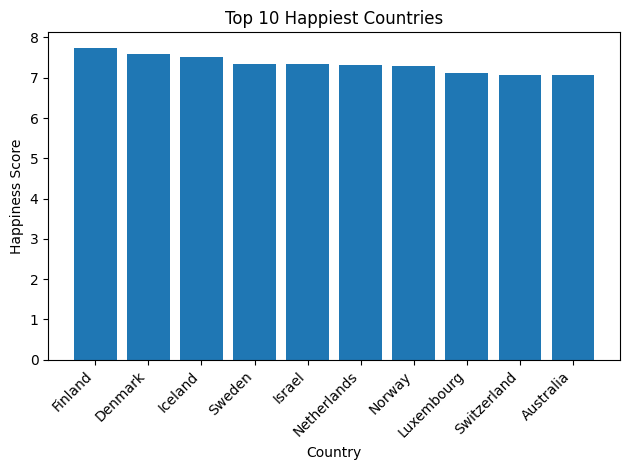

In [ ]:
# Sort the DataFrame by 'score' in descending order and get the top 10
top_10_happiest = df.sort_values('score', ascending=False).head(10)

# Create the bar plot
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Happiest Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

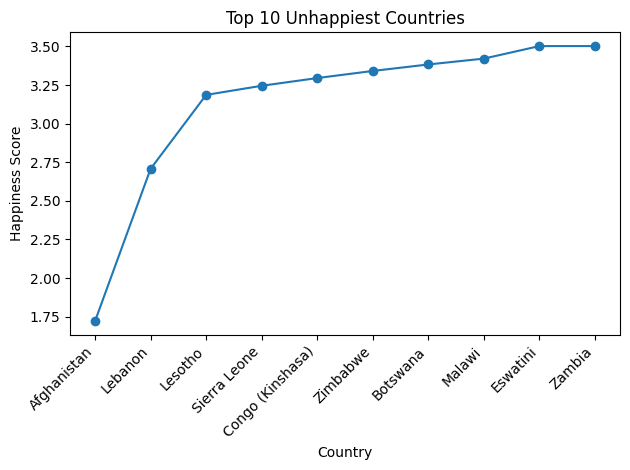

In [ ]:
# Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

# Sort the DataFrame by 'score' in ascending order and get the top 10
bottom_10_happiest = df.sort_values('score', ascending=True).head(10)

# Create the line plot
plt.plot(bottom_10_happiest['Country name'], bottom_10_happiest['score'], marker='o')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Plot a histogram for the Score column to show its distribution and also interpret.

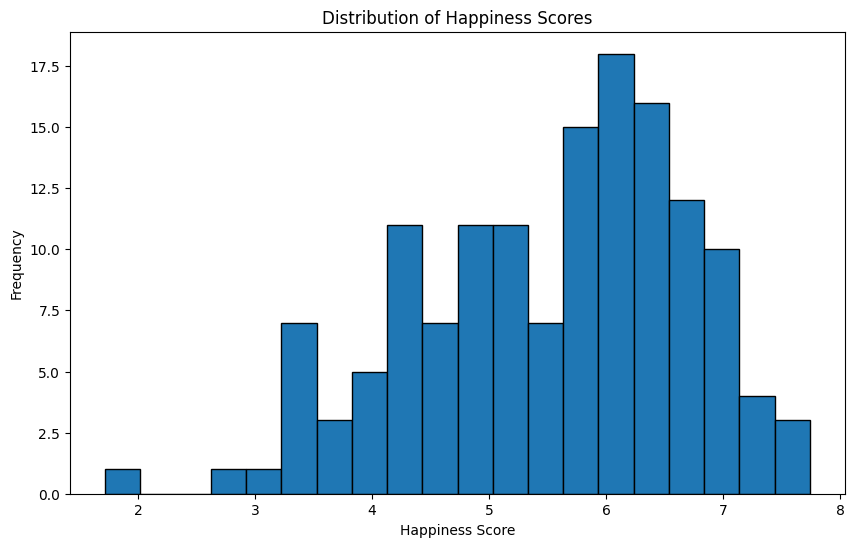

In [ ]:
# Plot a histogram for the Score column to show its distribution and also interpret.

# Plot a histogram for the Score column
plt.figure(figsize=(10, 6))
plt.hist(df['score'], edgecolor='black', bins=20)
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

# Interpretation:
# The histogram is a visual representation of distribution of happiness scores of countries.
# The x-axis shows the range of happiness scores i.e.(2, 8), while the y-axis indicates the number of countries that falls within the score interval.
# Observing the shape of the distribution:
#   - It is left skewed, its tail is longer on the left side.
#   - The most common socre is around 6.

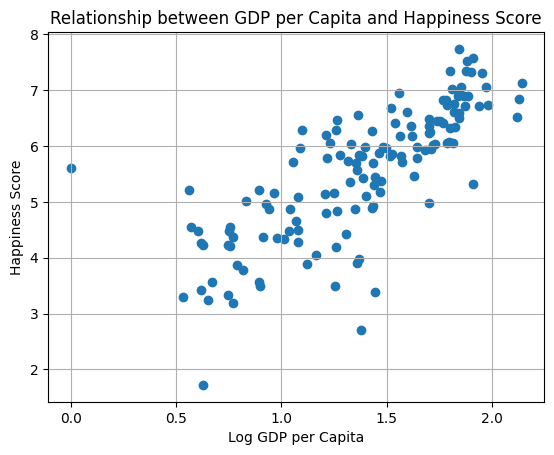

In [ ]:
# Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

plt.scatter(df['Log GDP per capita'], df['score'])
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Relationship between GDP per Capita and Happiness Score')
plt.grid(True)
plt.show()

# Problem - 2 - Some Advance Data Exploration Task:

In [ ]:
# Define the countries in South Asia with a list for example:
# south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal",
                         "Pakistan", "Sri Lanka"]

# Filter the DataFrame for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered DataFrame to a CSV file
south_asia_df.to_csv('/content/drive/MyDrive/AI/Datasets/south_asia_happiness.csv', index=False)

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

    Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [ ]:
# 1. Calculate the Composite Score
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                   0.30 * south_asia_df['Social support'] +
                                   0.30 * south_asia_df['Healthy life expectancy'])


<ipython-input-118-85de9cc9185b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +


In [ ]:
# 2. Rank the countries based on the Composite Score
south_asia_df = south_asia_df.sort_values('Composite Score', ascending=False)

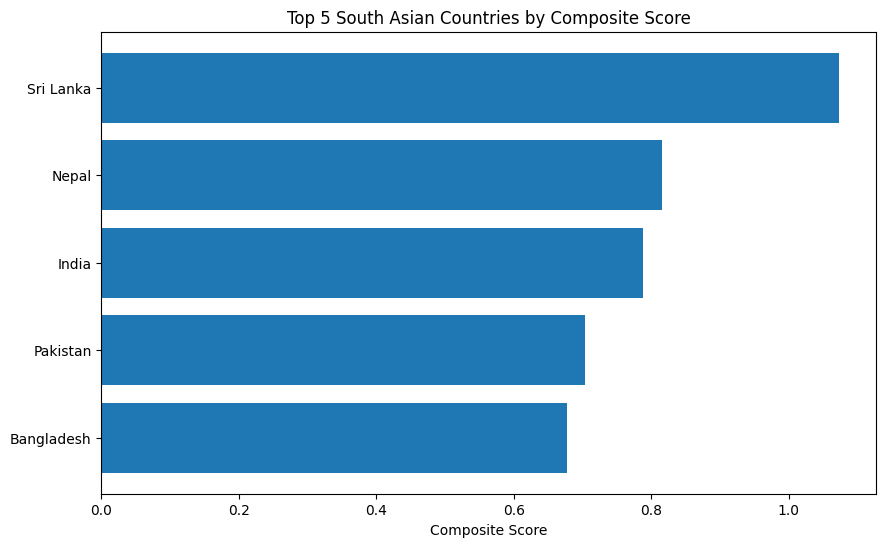

In [ ]:
# 3. Visualize the top 5 countries using a horizontal bar chart

# Select the top 5 countries based on the Composite Score
top_5_composite = south_asia_df.head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'])

# Add labels and title
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')

plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top

# Show the plot
plt.show()

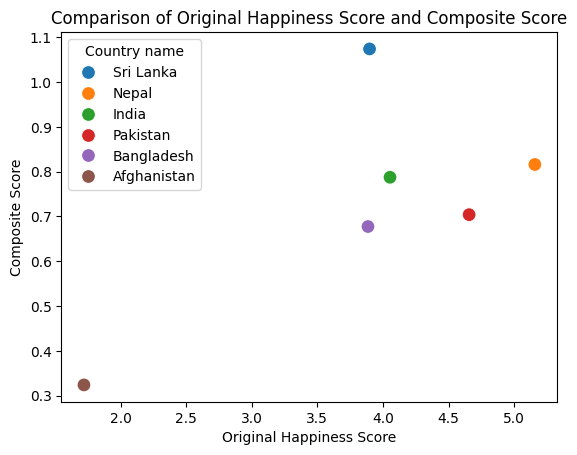

In [ ]:

# Compare rankings with the original Score
sns.scatterplot(x='score', y='Composite Score', data=south_asia_df, hue='Country name', s=100)
plt.xlabel("Original Happiness Score")
plt.ylabel("Composite Score")
plt.title("Comparison of Original Happiness Score and Composite Score")
plt.show()


In [ ]:
# Task - 3 - Outlier Detection:
# Tasks:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
# 2. Define outliers using the 1.5 × IQR rule.
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
# 4. Discuss the characteristics of these outliers and their potential impact on regional averages.


# Define a function to identify outliers
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Identify outliers in Score and GDP per Capita
score_outliers = identify_outliers(south_asia_df['score'])
gdp_outliers = identify_outliers(south_asia_df['Log GDP per capita'])

outlier_countries = south_asia_df[south_asia_df['score'].isin(score_outliers) | south_asia_df['Log GDP per capita'].isin(gdp_outliers)]
print("Outlier countries based on Score and GDP per Capita:")
outlier_countries

Outlier countries based on Score and GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,0.3238


<ipython-input-123-412dbc30d336>:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, hue=south_asia_df.index.isin(outliers.index), palette=['blue', 'red'], s=100)


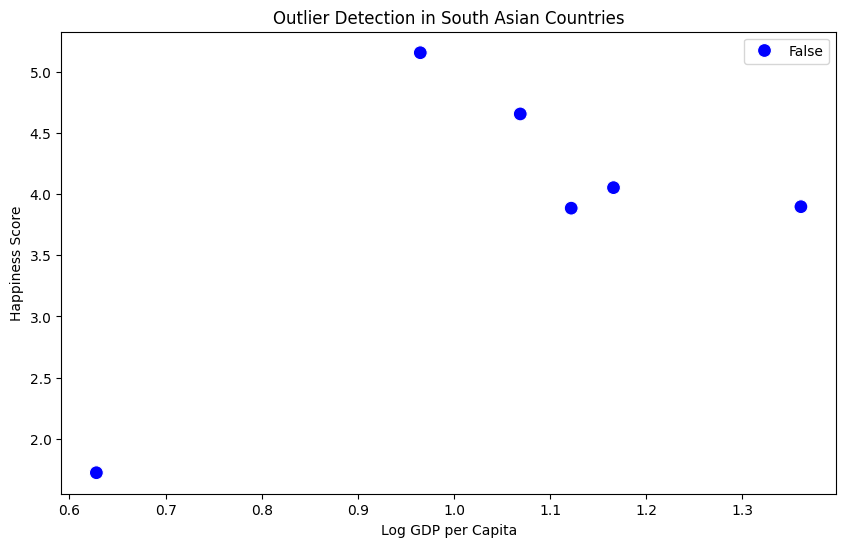

In [ ]:
# 3. Create a scatter plot highlighting outliers.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, hue=south_asia_df.index.isin(outliers.index), palette=['blue', 'red'], s=100)
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Outlier Detection in South Asian Countries")
plt.show()



 Correlation between Score and Freedom to make life choices: 0.8005185224163315 



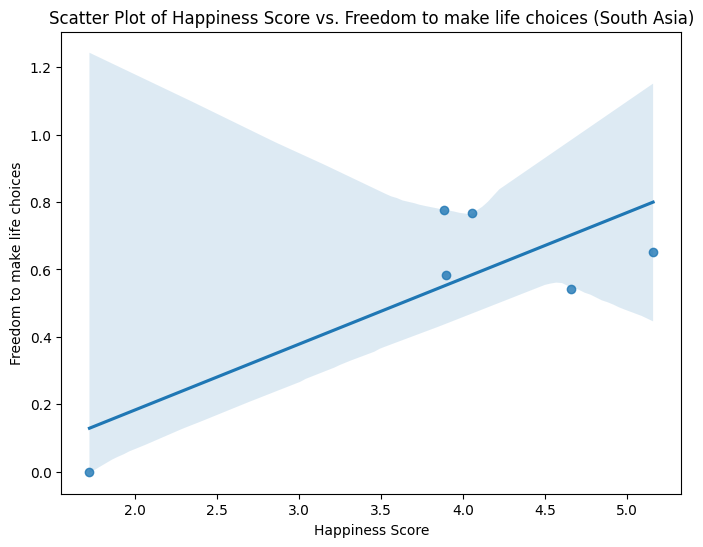


 Correlation between Score and Generosity: 0.874512371253192 



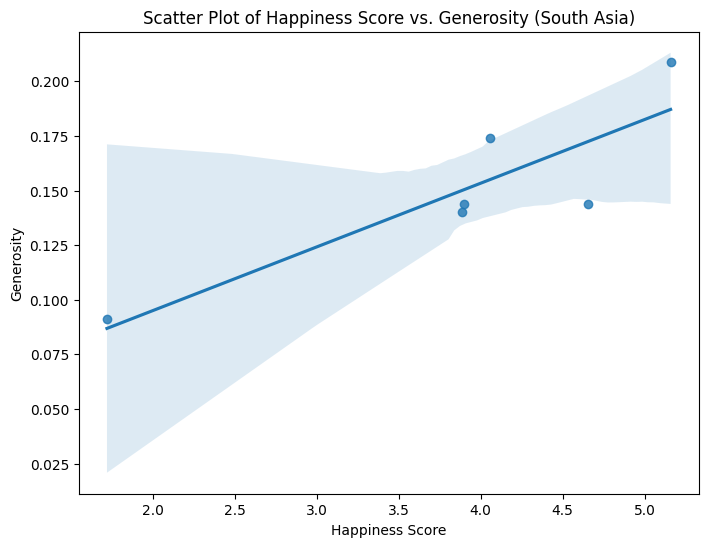

In [ ]:
#  Task - 4 - Exploring Trends Across Metrics:
# Tasks:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
# 2. Create scatter plots with trendlines for these metrics against the Score.
# 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

# Task - 4 - Exploring Trends Across Metrics:

# 1 & 2. Calculate correlation and create scatter plots with trendlines.
metrics = ['Freedom to make life choices', 'Generosity']

for metric in metrics:
    correlation = south_asia_df['score'].corr(south_asia_df[metric], method='pearson')
    print(f"\n Correlation between Score and {metric}: {correlation} \n")

    plt.figure(figsize=(8, 6))
    sns.regplot(x='score', y=metric, data=south_asia_df)
    plt.xlabel("Happiness Score")
    plt.ylabel(metric)
    plt.title(f"Scatter Plot of Happiness Score vs. {metric} (South Asia)")
    plt.show()



In [ ]:
# Task - 5 - Gap Analysis:
# Tasks:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
# 2. Rank the South Asian countries by this gap in both ascending and descending order.
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
# 4. Analyze the reasons behind these gaps and their implications for South Asian countries.

# 1. Calculate the GDP-Score Gap
south_asia_df['GDP-Score Gap']=south_asia_df['Log GDP per capita']-south_asia_df['score']
print("South Asis DataFrame with GDP-Score Gap:\n")
south_asia_df


South Asis DataFrame with GDP-Score Gap:



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,GDP-Score Gap
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,1.0739,-2.537
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,-4.193
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,-3.588
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,-1.093


In [ ]:
# 2. Rank the countries by the gap
south_asia_df_ranked_asc = south_asia_df.sort_values('GDP-Score Gap',ascending=True)
south_asia_df_ranked_desc = south_asia_df.sort_values('GDP-Score Gap', ascending=False)

print("\nSouth Asian Countries ranked by GDP-Score Gap (Ascending):")
south_asia_df_ranked_asc[['Country name', 'GDP-Score Gap']]




South Asian Countries ranked by GDP-Score Gap (Ascending):


,Country name,GDP-Score Gap
92,Nepal,-4.193
107,Pakistan,-3.588
125,India,-2.888
128,Bangladesh,-2.764
127,Sri Lanka,-2.537
142,Afghanistan,-1.093


In [ ]:
print("\nSouth Asian Countries ranked by GDP-Score Gap (Descending):")
south_asia_df_ranked_desc[['Country name', 'GDP-Score Gap']]


South Asian Countries ranked by GDP-Score Gap (Descending):


,Country name,GDP-Score Gap
142,Afghanistan,-1.093
127,Sri Lanka,-2.537
128,Bangladesh,-2.764
125,India,-2.888
107,Pakistan,-3.588
92,Nepal,-4.193


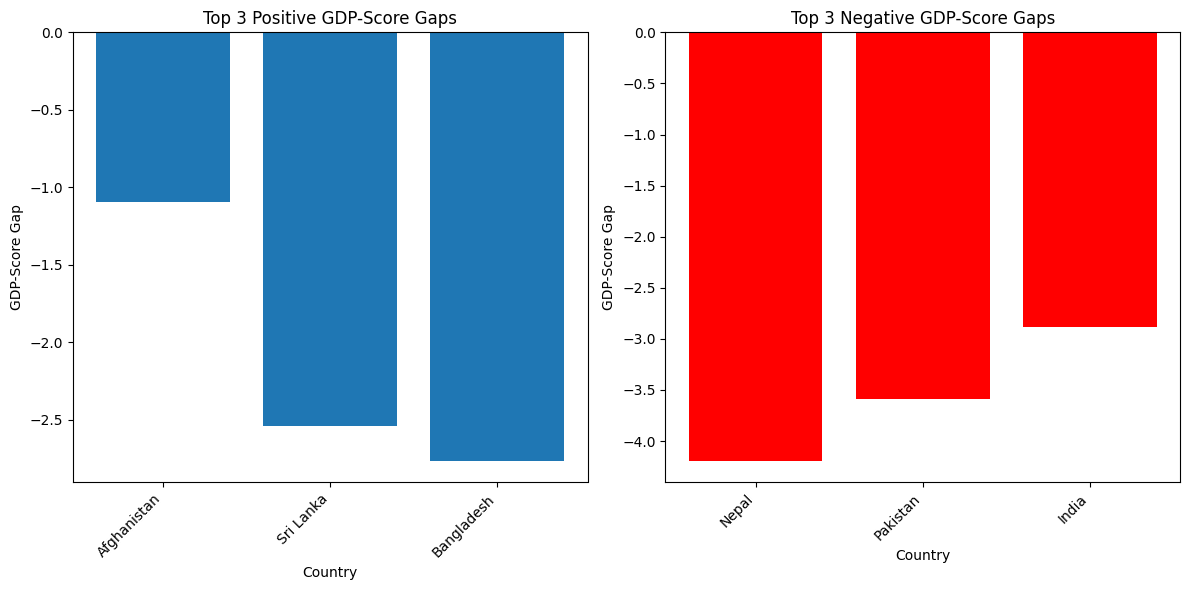

In [ ]:
# 3. Highlight top 3 countries with largest positive and negative gaps
top_3_positive = south_asia_df_ranked_desc.head(3)
top_3_negative = south_asia_df_ranked_asc.head(3)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_3_positive['Country name'], top_3_positive['GDP-Score Gap'])
plt.xlabel("Country")
plt.ylabel("GDP-Score Gap")
plt.title("Top 3 Positive GDP-Score Gaps")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(top_3_negative['Country name'], top_3_negative['GDP-Score Gap'], color='red')
plt.xlabel("Country")
plt.ylabel("GDP-Score Gap")
plt.title("Top 3 Negative GDP-Score Gaps")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [136]:
# 4. Analyze the reasons behind the gaps
print("The reason behind these gaps, for positive gaps countries like Bangladesh, Sri Lanka and Afghanistan have higher GDP but lower happiness score. ")
print("For negative gap countries like Nepal, India and Pakistan the GDP is lower but the happiness score is higher.")
print("These factors may have been affected by economic or political instability,freedom and many others.")


The reason behind these gaps, for positive gaps countries like Bangladesh, Sri Lanka and Afghanistan have higher GDP but lower happiness score. 
For negative gap countries like Nepal, India and Pakistan the GDP is lower but the happiness score is higher.
These factors may have been affected by economic or political instability,freedom and many others.


In [ ]:
# 3.3 Problem - 3 - Comparative Analysis:
# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
# Tasks:
# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
# following list:
# middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
# "United Arab Emirates", "Yemen"]

# Define the list of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]


# Filter the DataFrame to include only Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

middle_east_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [ ]:
# 1. Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# • Which region has higher happiness Scores on average?

# Calculate the mean and standard deviation of the score for South Asia
south_asia_mean_score = south_asia_df['score'].mean()
south_asia_median_score = south_asia_df['score'].median()
south_asia_std_score = south_asia_df['score'].std()

print(f"South Asia: Mean Happiness Score = {south_asia_mean_score:.2f}, Median Happiness Score = {south_asia_median_score:.2f}, Standard Deviation = {south_asia_std_score:.2f}")

# Calculate the mean and standard deviation of the score for the Middle East
middle_east_mean_score = middle_east_df['score'].mean()
middle_east_median_score = middle_east_df['score'].median()
middle_east_std_score = middle_east_df['score'].std()

print(f"Middle East: Mean Happiness Score = {middle_east_mean_score:.2f}, Median Happiness Score = {middle_east_median_score:.2f}, Standard Deviation = {middle_east_std_score:.2f}")

# Determine which region has a higher average happiness score
if south_asia_mean_score > middle_east_mean_score:
    print("South Asia has a higher average happiness score.")
elif middle_east_mean_score > south_asia_mean_score:
    print("The Middle East has a higher average happiness score.")
else:
    print("Both regions have the same average happiness score.")

South Asia: Mean Happiness Score = 3.90, Median Happiness Score = 3.98, Standard Deviation = 1.18
Middle East: Mean Happiness Score = 5.41, Median Happiness Score = 5.56, Standard Deviation = 1.57
The Middle East has a higher average happiness score.


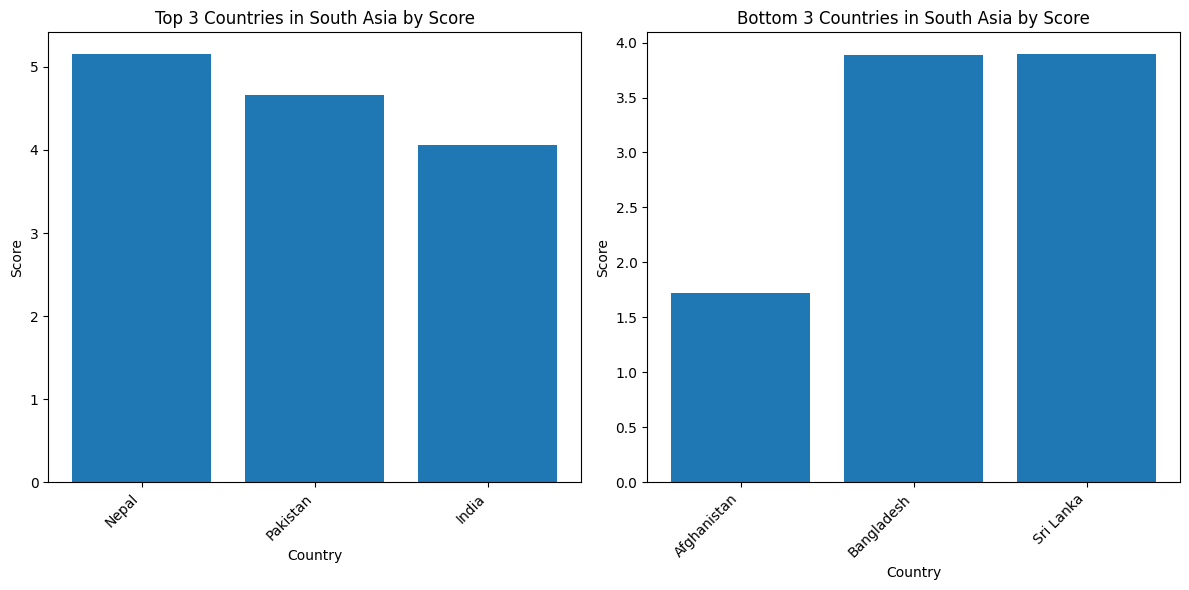

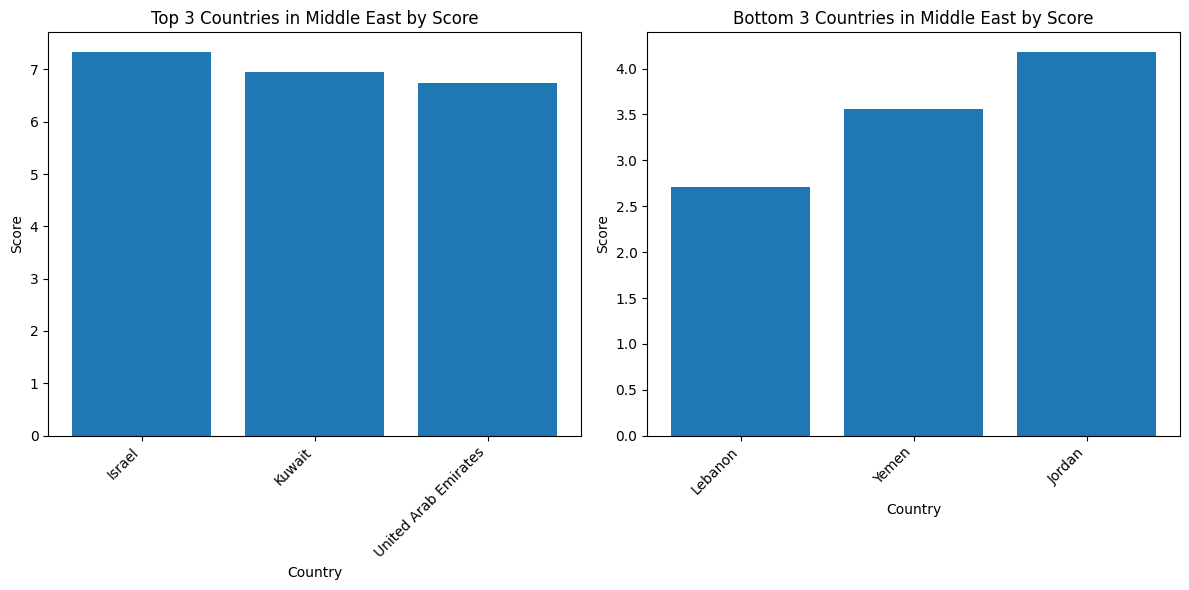

In [ ]:
#  2. Top and Bottom Performers:
#  Identify the top 3 and bottom 3 countries in each region based on the score.
#  Plot bar charts comparing these charts.

def plot_top_bottom(df, region_name):

    top_3 = df.nlargest(3, 'score')
    bottom_3 = df.nsmallest(3, 'score')

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(top_3['Country name'], top_3['score'])
    plt.xlabel("Country")
    plt.ylabel("Score")
    plt.title(f"Top 3 Countries in {region_name} by Score")
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    plt.bar(bottom_3['Country name'], bottom_3['score'])
    plt.xlabel("Country")
    plt.ylabel("Score")
    plt.title(f"Bottom 3 Countries in {region_name} by Score")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Plot for South Asia
plot_top_bottom(south_asia_df, "South Asia")

# Plot for the Middle East
plot_top_bottom(middle_east_df, "Middle East")

<ipython-input-132-364952a4825d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_df.loc[:, 'Region'] = 'Middle East'


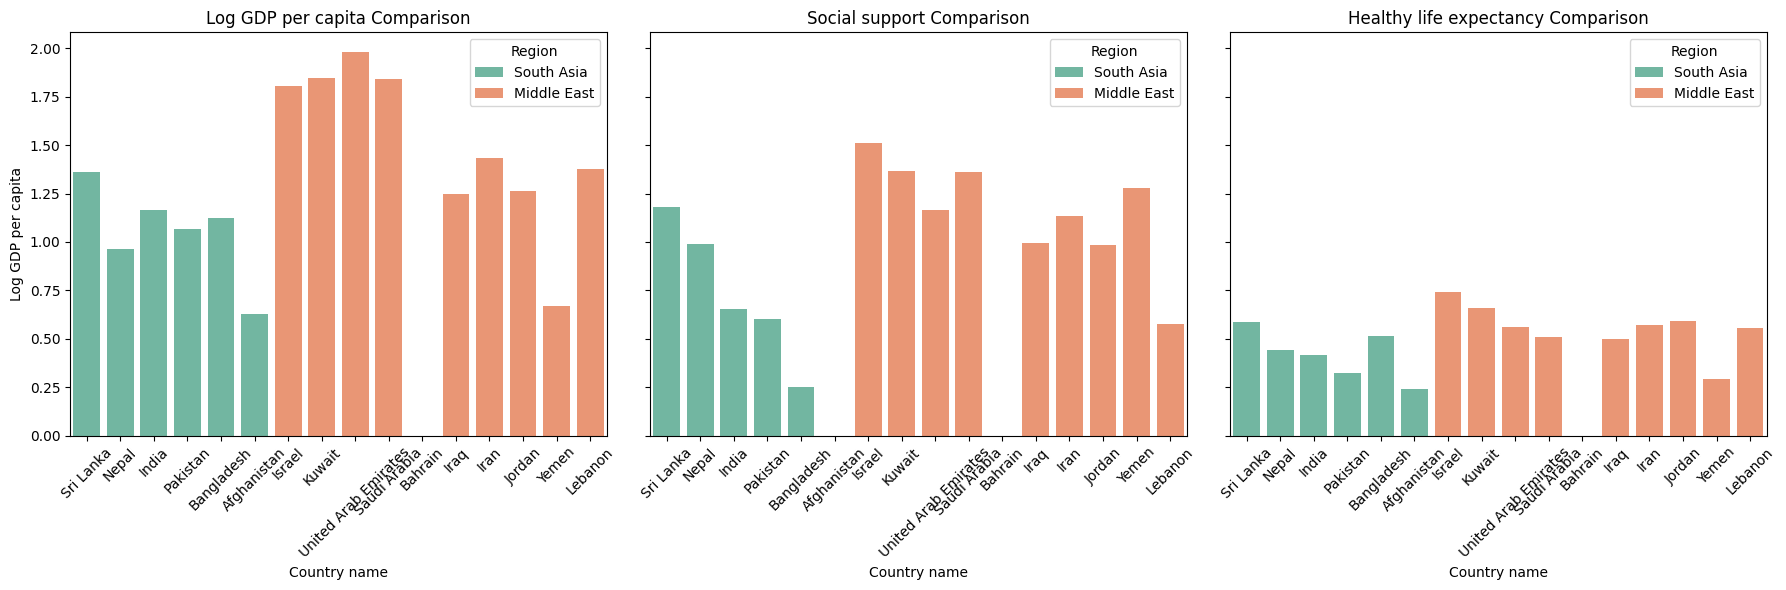

In [ ]:
# Add the 'Region' column to the South Asia and Middle East DataFrames using .loc
south_asia_df.loc[:, 'Region'] = 'South Asia'
middle_east_df.loc[:, 'Region'] = 'Middle East'

# List of metrics to compare
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Subsetting data for South Asia and Middle East
df_south_asia_metrics = south_asia_df[metrics + ['Country name', 'Region']]
df_middle_east_metrics = middle_east_df[metrics + ['Country name', 'Region']]

# Create the plot with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, metric in enumerate(metrics):
    # Concatenating the two dataframes and creating the grouped bar chart
    combined_df = pd.concat([df_south_asia_metrics[[metric, 'Country name', 'Region']],
                             df_middle_east_metrics[[metric, 'Country name', 'Region']]])

    sns.barplot(data=combined_df, x='Country name', y=metric, hue='Region', ax=axes[i], palette='Set2')
    axes[i].set_title(f"{metric} Comparison")

    # Setting tick labels after ensuring the ticks are fixed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# 4. Happiness Disparity:
# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
# • Which region has greater variability in happiness?

# 4. Happiness Disparity:
# Compute the range and coefficient of variation (CV) for Score in both regions.

def disparity_analysis(df, region_name):
    score_range = df['score'].max() - df['score'].min()
    score_cv = df['score'].std() / df['score'].mean()
    print(f"{region_name}:")
    print(f"  Range of Happiness Score: {score_range:.2f}")
    print(f"  Coefficient of Variation (CV): {score_cv:.2f}")
    return score_range, score_cv

south_asia_range, south_asia_cv = disparity_analysis(south_asia_df, "South Asia")
middle_east_range, middle_east_cv = disparity_analysis(middle_east_df, "Middle East")

# Determine which region has greater variability
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
elif middle_east_cv > south_asia_cv:
    print("The Middle East has greater variability in happiness.")
else:
    print("Both regions have similar variability in happiness.")

South Asia:
  Range of Happiness Score: 3.44
  Coefficient of Variation (CV): 0.30
Middle East:
  Range of Happiness Score: 4.63
  Coefficient of Variation (CV): 0.29
South Asia has greater variability in happiness.



Correlation Analysis for South Asia:

 Correlation between Score and Freedom to make life choices: 0.8005185224163315



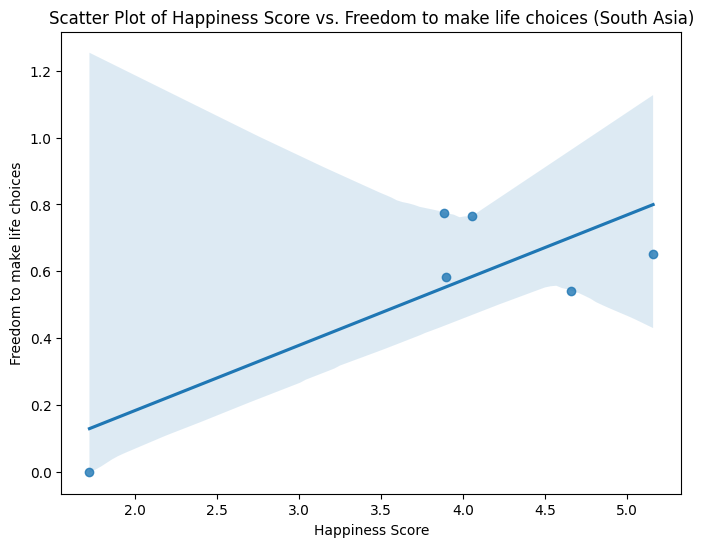


 Correlation between Score and Generosity: 0.874512371253192



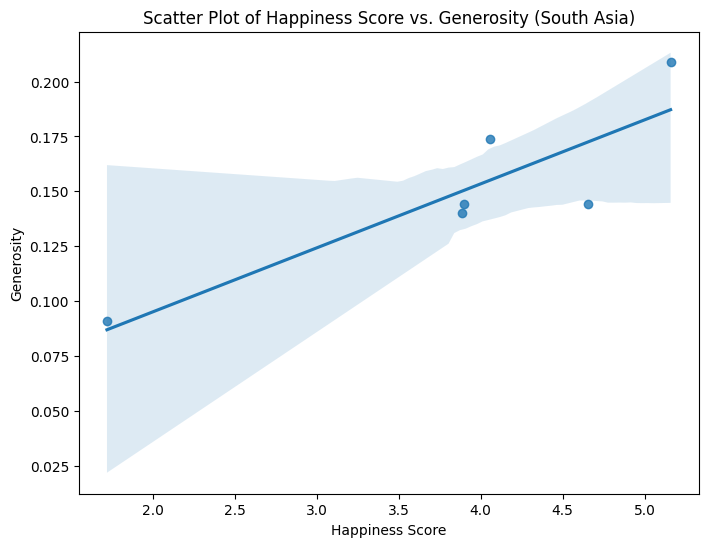


Correlation Analysis for Middle East:

 Correlation between Score and Freedom to make life choices: 0.8632202433827544



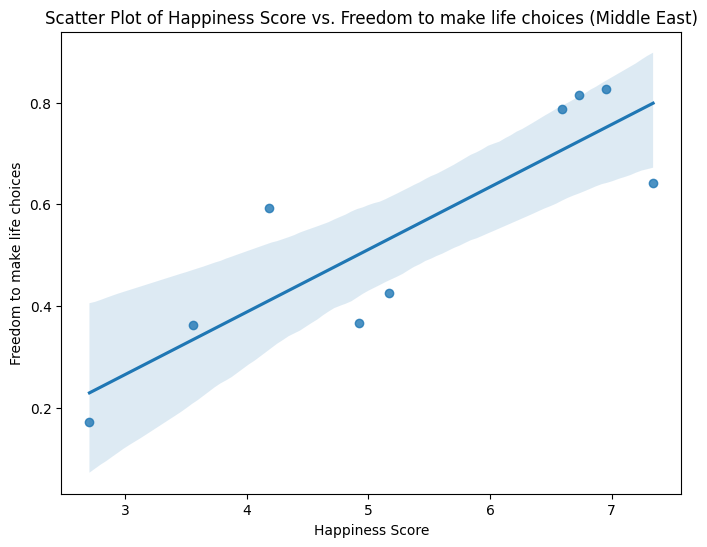


 Correlation between Score and Generosity: 0.6275236536964182



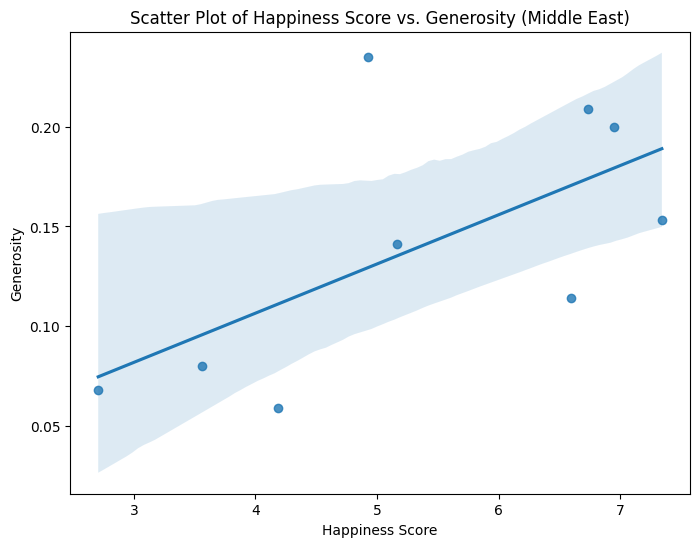

In [ ]:
# 5. Correlation Analysis:
# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
# Generosity within each region.
# • Create scatter plots to visualize and interpret the relationships.

# Task 5. Correlation Analysis
metrics = ['Freedom to make life choices', 'Generosity']

for region_name, df in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    print(f"\nCorrelation Analysis for {region_name}:")
    for metric in metrics:
        correlation = df['score'].corr(df[metric], method='pearson')
        print(f"\n Correlation between Score and {metric}: {correlation}\n")

        plt.figure(figsize=(8, 6))
        sns.regplot(x='score', y=metric, data=df)
        plt.xlabel("Happiness Score")
        plt.ylabel(metric)
        plt.title(f"Scatter Plot of Happiness Score vs. {metric} ({region_name})")
        plt.show()

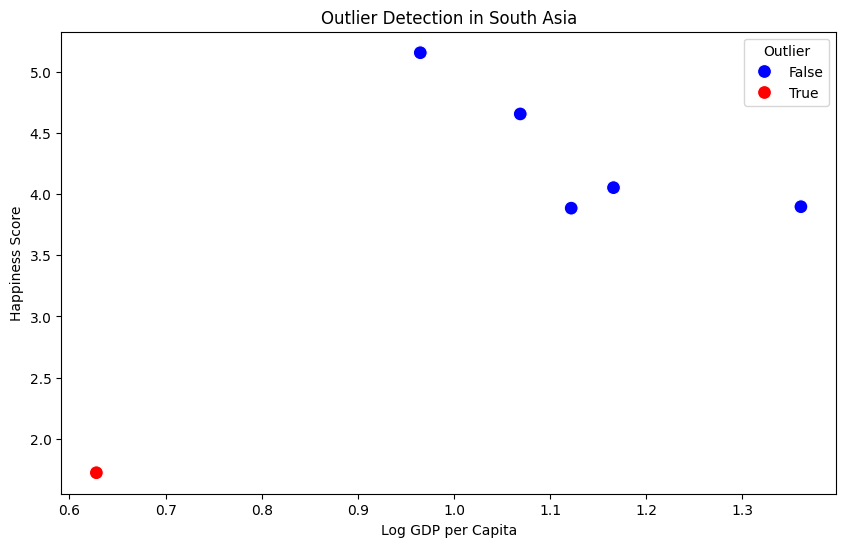


Outlier Countries in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


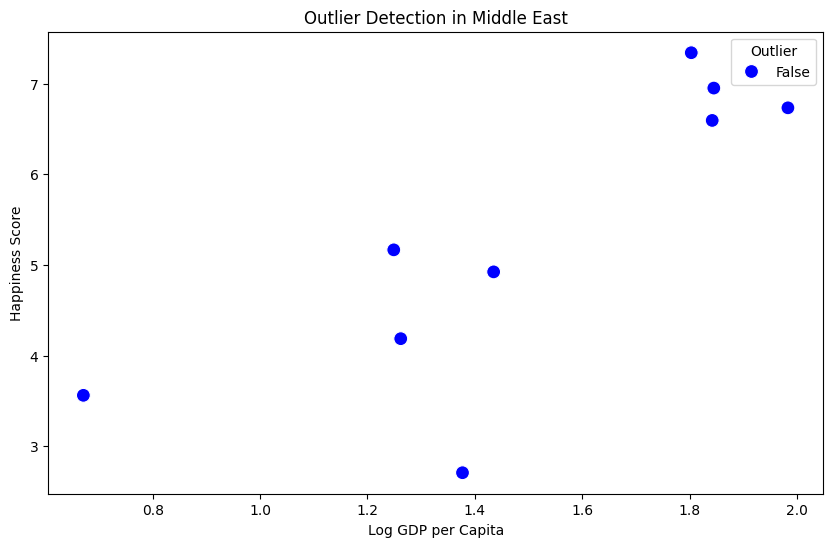


Outlier Countries in Middle East:
Empty DataFrame
Columns: [Country name, score, Log GDP per capita]
Index: []


In [ ]:
# 6. Outlier Detection:
# • Identify outlier countries in both regions based on Score and GDP per Capita.
# • Plot these outliers and discuss their implications.

def detect_outliers(df, region_name):
    """Detects and visualizes outliers based on Score and GDP per Capita."""

    # Calculate IQR for 'score'
    Q1_score = df['score'].quantile(0.25)
    Q3_score = df['score'].quantile(0.75)
    IQR_score = Q3_score - Q1_score
    lower_bound_score = Q1_score - 1.5 * IQR_score
    upper_bound_score = Q3_score + 1.5 * IQR_score

    # Calculate IQR for 'Log GDP per capita'
    Q1_gdp = df['Log GDP per capita'].quantile(0.25)
    Q3_gdp = df['Log GDP per capita'].quantile(0.75)
    IQR_gdp = Q3_gdp - Q1_gdp
    lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
    upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

    # Identify outliers
    outliers_score = df[(df['score'] < lower_bound_score) | (df['score'] > upper_bound_score)]
    outliers_gdp = df[(df['Log GDP per capita'] < lower_bound_gdp) | (df['Log GDP per capita'] > upper_bound_gdp)]
    outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

    # Create a copy to avoid "SettingWithCopyWarning"
    df_copy = df.copy()
    df_copy['Outlier'] = df_copy.index.isin(outliers.index)

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Log GDP per capita', y='score', data=df_copy, hue='Outlier',
                    palette={True: 'red', False: 'blue'}, s=100)
    plt.xlabel("Log GDP per Capita")
    plt.ylabel("Happiness Score")
    plt.title(f"Outlier Detection in {region_name}")
    plt.show()

    # Print outlier details
    print(f"\nOutlier Countries in {region_name}:")
    print(outliers[['Country name', 'score', 'Log GDP per capita']])


# Detect outliers for South Asia
detect_outliers(south_asia_df, "South Asia")

# Detect outliers for the Middle East
detect_outliers(middle_east_df, "Middle East")


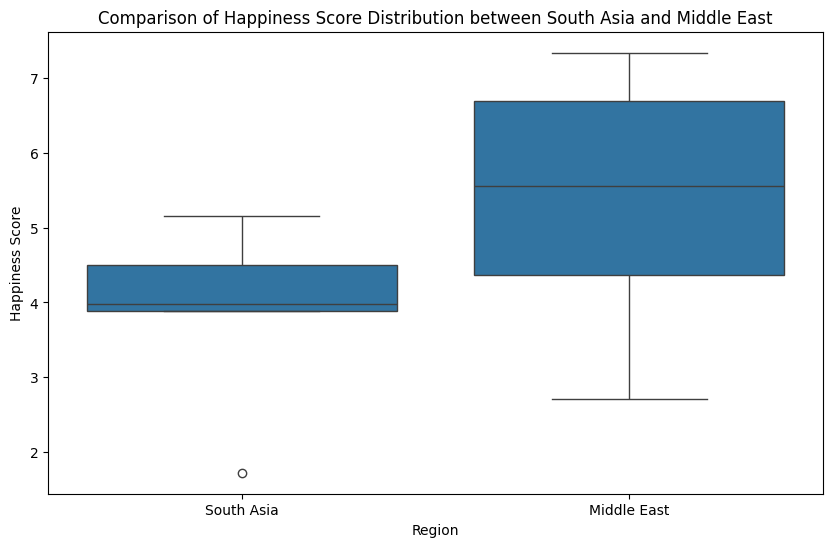

In [ ]:
# 7. Visualization:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
# • Interpret the key differences in distribution shapes, medians, and outliers.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_df.assign(Region='South Asia'),
    middle_east_df.assign(Region='Middle East')
]))
plt.title('Comparison of Happiness Score Distribution between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()



In [ ]:
print("Interpretation:\n")
print("Median Comparison:")
print("")
print(" South Asia has a lower median (Approx)4.0 compared to the Middle East (Approx)5.5.")

print("\nDistribution Shape:")
print("The Data of Middle East is almost uniformly distributed in comparison to South Asia in which the data are clustered")

print("\nOutliers:")
print(" South Asia has a outlier that is lower than 2 but Middle East doesnot have any outlier.")


Interpretation:

Median Comparison:
 South Asia has a lower median (~4.0) compared to the Middle East (~5.5-6.0).

Distribution Shape:
 South Asia shows low variability with tightly clustered scores, while the Middle East has a wider spread.

Outliers:
 South Asia has a lower outlier (~1.7); the Middle East has no visible outliers.
